# Credit Card Fraud Detection 💳

<img src='../../images-library/computer-security-lock-and-payment.jpg'>
          
Photo by <a href="https://burst.shopify.com/@ndekhors?utm_campaign=photo_credit&amp;utm_content=Free+Stock+Photo+of+Computer+Security+Lock+And+Payment+%E2%80%94+HD+Images&amp;utm_medium=referral&amp;utm_source=credit">Nicole De Khors</a> from <a href="https://burst.shopify.com/technology?utm_campaign=photo_credit&amp;utm_content=Free+Stock+Photo+of+Computer+Security+Lock+And+Payment+%E2%80%94+HD+Images&amp;utm_medium=referral&amp;utm_source=credit">Burst</a>


## Objectives 🚀

Identify fraudulent credit card transactions 💳.

*Source : Kaggle Challenge :* [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)


## Context

Fraud detection is a billion dollars business 💰: according to the [Nilson Report](https://nilsonreport.com/), credit card fraud adds up to 24 billion dollars in 2018 ! 

Every bank and insurance company has some fraud detection algorithms. They are working hard to find out the fraudulent transactions amongst a huge number of valid ones.

Some companies are doing really good. For instance, Paypal has developed really complicated and efficient algorithms to perform fraud detection.


## Dataset

All important files used for my project saved [here](https://drive.google.com/drive/u/0/folders/12q21VCLoatz58Nr45ATdJmZi33Z2xMot).

📥 I download the dataset on [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud).

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284 807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.17% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. The only features which have not been transformed with PCA are `Time` and `Amount`:
- Features `V1`, `V2`, … `V28` are the principal components obtained with PCA
- Feature `Time` contains the seconds elapsed between each transaction and the first transaction in the dataset. 
- The feature `Amount` is the transaction Amount (euros), this feature can be used for example-dependant cost-senstive learning. 
- Feature `Class` is the response variable and it takes value 1 in case of fraud and 0 otherwise

<h1> Import

In [1]:
#System library
import os

#Data manipulation
import pandas as pd, numpy as np

#Data storage
import pickle

#Data visualization
import matplotlib.pyplot as plt, seaborn as sns
#from mpl_toolkits import mplot3d                                                          #3D visualization
#%matplotlib notebook

#Data Preprocessing
from sklearn.preprocessing import StandardScaler                                           #Data scaling
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV     #Data split and hyperparameter                       
from imblearn.over_sampling import SMOTE                                                   #Data oversampling

#Supervised Machine Learning Model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

#Unsupervised Machine Learning Model
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

#Metrics computed for Classification
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.metrics import roc_curve

I load my dataset in a pandas dataframe :

In [7]:
#Define dataset path :
filepath = os.path.join('data', 'creditcard.csv')

In [8]:
#Load csv file with pandas dataframe
creditcard = pd.read_csv(filepath)
creditcard.shape

(284807, 31)

As we can see, the data has thirty one columns as follows:
- `V1`, `V2`, … `V28` : principal components obtained with PCA
- `Time`: seconds elapsed between each transaction and the first transaction in the dataset. 
- `Amount`: transaction Amount (euros), this feature can be used for example-dependant cost-senstive learning. 
- `Class`: response variable which takes value 1 in case of fraud and 0 otherwise

In [9]:
#see the first five rows of data
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<h1> 1. Exploration Data Analysis

<h2> 1.1 Data Cleaning 

It contains continue values but my target (`Class`) is discrete values : It's a supervised Machine Learning case (Classification).

In [5]:
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
#Statistical summaries of the numerical columns
creditcard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Next, I display some statistical summaries of the numerical columns below :
- `Amount` mean = 88€
- `Amount` max = 25 691€
- `Time` max = 172 792s (i.e. 48h)

I haven't null values.

In [7]:
#Number of null values
creditcard.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

I drop duplicates in my dataframe because they are useless :

In [10]:
#Number of duplicates
creditcard.duplicated().sum()

1081

In [11]:
#Drop duplicates
creditcard.drop_duplicates(inplace=True)

creditcard.shape

(283726, 31)

In [12]:
#Number of duplicates
creditcard.duplicated().sum()

0

In [13]:
#I save creditcard dataframe in local file
filepath_creditcard_data = os.path.join('data', 'creditcard.pkl')

with open(filepath_creditcard_data, 'wb') as f:
    pickle.dump(creditcard, f)

<h2> 1.2 Data Analysis

In [2]:
#I import creditcard dataframe from local file
filepath_creditcard_data = os.path.join('data', 'creditcard.pkl')

with open(filepath_creditcard_data, 'rb') as f:
    creditcard = pickle.load(f)

According to Kaggle documentation, `V1` is a result of a PCA Dimensionality reduction to protect user identities and sensitive features (`V1`to `V8`) so I decide to select `Time`, `Amount` and `V1` to visualize my data.

In [15]:
creditcard.head(n=5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


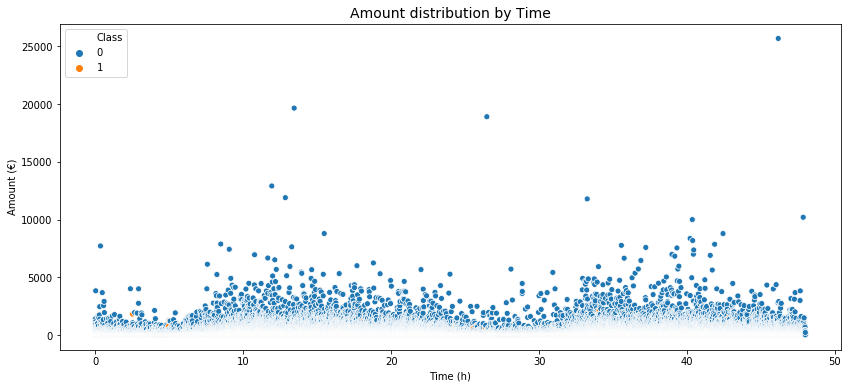

In [23]:
plt.figure(figsize=(14, 6))

#Plot Amount distribution by Time
plt.title('Amount distribution by Time', fontsize=14)
sns.scatterplot(x='Time', y='Amount', hue='Class', data=creditcard)
plt.xlabel('Time (h)')
plt.ylabel('Amount (€)')

plt.show()

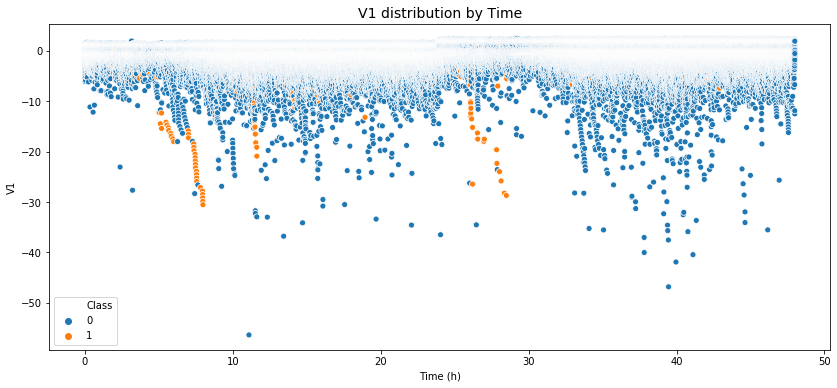

In [29]:
#Plot V1 distribution by Time
plt.figure(figsize=(14, 6))

plt.title('V1 distribution by Time', fontsize=14)
sns.scatterplot(x='Time', y='V1', hue='Class', data=creditcard)
plt.xlabel('Time (h)')

plt.show()

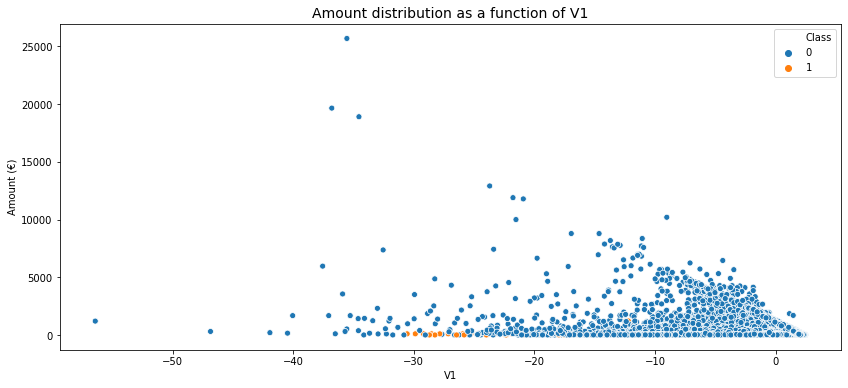

In [38]:
#Plot Amount distribution in function of V1
plt.figure(figsize=(14, 6))

plt.title('Amount distribution as a function of V1', fontsize=14)
sns.scatterplot(x='V1', y='Amount', hue='Class', data=creditcard)
plt.ylabel('Amount (€)')


#Save the graph with plt.savefig
filepath_dist_amount_v1 = os.path.join('graph', 'credit-card-fraud-dist-amount-V1.jpg')
plt.savefig(filepath_dist_amount_v1,                                                        #Image path
            format='jpg',                                                                   #Image format to save
            bbox_inches='tight') 

plt.show()

<h3> Fraudulent/Non-fraudulent transactions distribution :

The dataset is highly unbalanced, the positive class (frauds) account for 0.17% of all transactions :

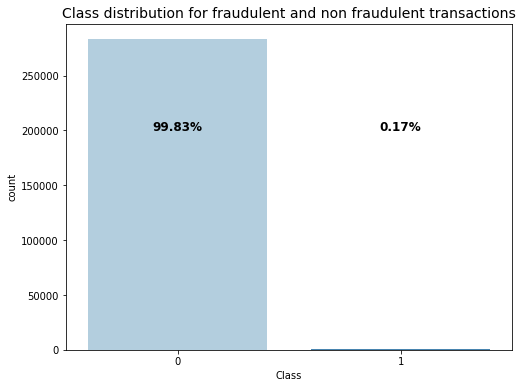

In [50]:
plt.figure(figsize=(8, 6))

#Plot the Class distributions for fraudulent and non fraudulent transactions
plt.title('Class distribution for fraudulent and non fraudulent transactions', size=14)       #Graph title

#Countplot graph
sns.countplot(x='Class',                                                                      #Data to plot : Class    
              data=creditcard,
              palette="Blues")                                                                

#Write the Class percentage on top
grouped_values = (creditcard.Class.value_counts() / creditcard.Class.shape[0]) * 100          #Compute Class percentage
for label, value in enumerate(grouped_values):
    plt.text(label,                                                                           #Class index
             value + 200000,                                                                  #Class percentage position
             str(round(value,2)) + '%',                                                       #Class percentage to print
             ha="center",                                                                     #Center Class percentage label
             fontweight='bold',                                                               #Text property
             fontsize=12)                                                                     #Text property      

#Save the graph with plt.savefig
filepath_fig_fraud_distributions = os.path.join('graph', 'credit-card-fraud-transactions-distributions.jpg')
plt.savefig(filepath_fig_fraud_distributions,                                                 #Image path
            format='jpg',                                                                     #Image format to save
            bbox_inches='tight')                                                              #Keep abscissa legend

plt.show()

In [10]:
(creditcard['Class'].value_counts() / creditcard['Class'].shape[0]) * 100

0    99.83329
1     0.16671
Name: Class, dtype: float64

To build Machine Learning model, I use oversampling or undersampling method to balance my dataset later.

<h3> Amount transactions distribution :

I plot distribution of transaction `Amount` :

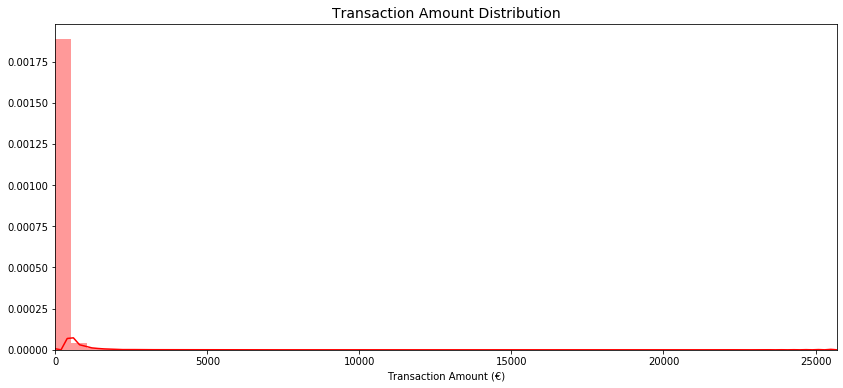

In [8]:
plt.figure(figsize=(14, 6))

#Plot Transaction Amount Distribution
plt.title('Transaction Amount Distribution', size=14)                   #Graph title

#Distplot graph
sns.distplot(a=creditcard['Amount'],                                    #Amount data to plot
             axlabel= 'Transaction Amount (€)',                         #Abscissa label
             bins=50, 
             color='r')         
plt.xlim((min(creditcard['Amount']), max(creditcard['Amount'])))        #Abscissa interval to plot data

#Save the graph with plt.savefig
filepath_fig_amount_distributions = os.path.join('graph', 'credit-card-transactions-amount-distributions.jpg')
plt.savefig(filepath_fig_amount_distributions,                          #Image path
            format='jpg',                                               #Image format to save
            bbox_inches='tight')                                        #Keep abscissa legend

plt.show()

Most of amount transactions is lower than 2 000€, however there is amount higher than 25 000€. I suppose that  fraudulent transactions is in this interval. I plot Transaction Amount for fraudulent and non-fraudulent transactions to have more precision :

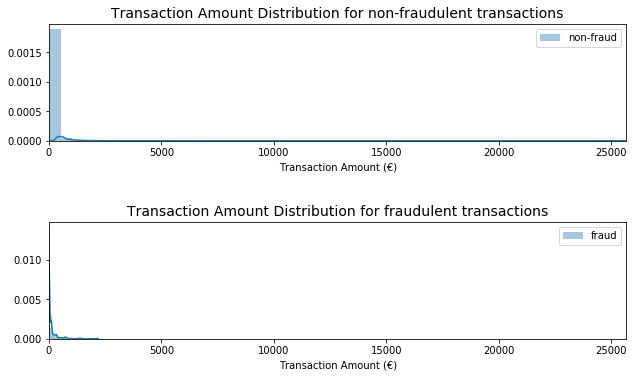

In [9]:
plt.figure(figsize=(10, 6))

#Plot Transaction Amount Distribution for non-fraudulent transactions
plt.subplot(2, 1, 1)
plt.title('Transaction Amount Distribution for non-fraudulent transactions', size=14)    #Graph title

#Countplot for non-fraudulent Transaction Amount Distribution
sns.distplot(creditcard.loc[creditcard['Amount'].notnull() & (creditcard['Class'] == 0), 'Amount'],
             label='non-fraud',                                         #Curve label
             axlabel= 'Transaction Amount (€)',                         #Abscissa label
             bins=50)                         

plt.xlim((min(creditcard['Amount']), max(creditcard['Amount'])))        #Abscissa interval to plot data
plt.legend()                                                            #Graph legend
plt.tight_layout(pad=5)                                                 #adjust subplot parameters to give specified padding

#Plot Transaction Amount Distribution for fraudulent transactions
plt.subplot(2, 1, 2)
plt.title('Transaction Amount Distribution for fraudulent transactions', size=14)    #Graph title

#Countplot for fraudulent Transaction Amount Distribution
sns.distplot(creditcard.loc[creditcard['Amount'].notnull() & (creditcard['Class'] == 1), 'Amount'],
             label='fraud',                                             #Curve label
             axlabel= 'Transaction Amount (€)')                         #Abscissa label
        
plt.xlim((min(creditcard['Amount']), max(creditcard['Amount'])))        #Abscissa interval to plot data
plt.legend()                                                            #Graph legend

#Save the graph with plt.savefig
filepath_fig_amount_fraud_distributions = os.path.join('graph', 'credit-card-transactions-amout-nonfraud-fraud-distributions.jpg')
plt.savefig(filepath_fig_amount_fraud_distributions,                   #Image path
            format='jpg',                                              #Image format to save
            bbox_inches='tight')                                       #Keep abscissa legend

plt.show()

Fraudulent transactions amount is **150€** in average: :

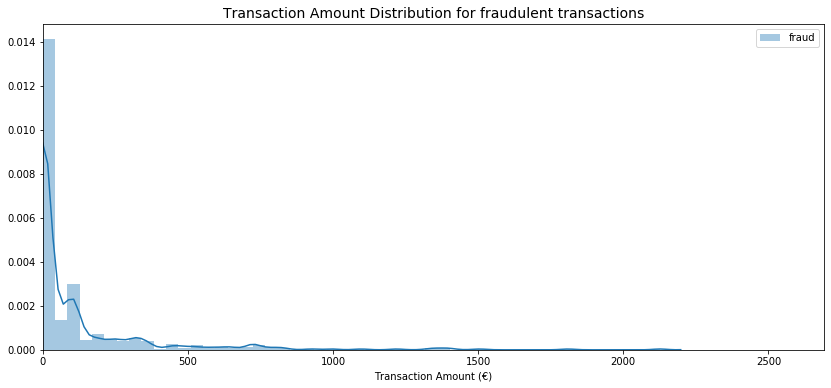

In [6]:
plt.figure(figsize=(14, 6))

#Plot Transaction Amount Distribution for fraudulent transactions
plt.title('Transaction Amount Distribution for fraudulent transactions', size=14)    #Graph title

#Countplot for fraudulent Transaction Amount Distribution
sns.distplot(creditcard.loc[creditcard['Amount'].notnull() & (creditcard['Class'] == 1), 'Amount'],
             label='fraud',                                               #Curve label
             axlabel= 'Transaction Amount (€)')                           #Abscissa label
        
plt.xlim((min(creditcard['Amount']), max(creditcard['Amount']) - 23000))  #Abscissa interval to plot data
plt.legend()                                                              #Graph legend

#Save the graph with plt.savefig
filepath_fig_amount_fraud_distributions = os.path.join('graph', 'credit-card-transactions-amout-fraud-distributions.jpg')
plt.savefig(filepath_fig_amount_fraud_distributions,                      #Image path
            format='jpg',                                                 #Image format to save
            bbox_inches='tight')                                          #Keep abscissa legend

plt.show()

<h3> Time transactions distribution :

The dataset contains transactions for two days that corresponds to 48 hours (1 hour = 3600s).

In [14]:
max(creditcard['Time']) / 3600

47.99777777777778

I modify `Time` because it's not relevant in second : I transform `Time` from **second** into **hour**.

In [3]:
creditcard['Time'] = creditcard['Time'] / 3600

I plot distribution of transaction `Time` :

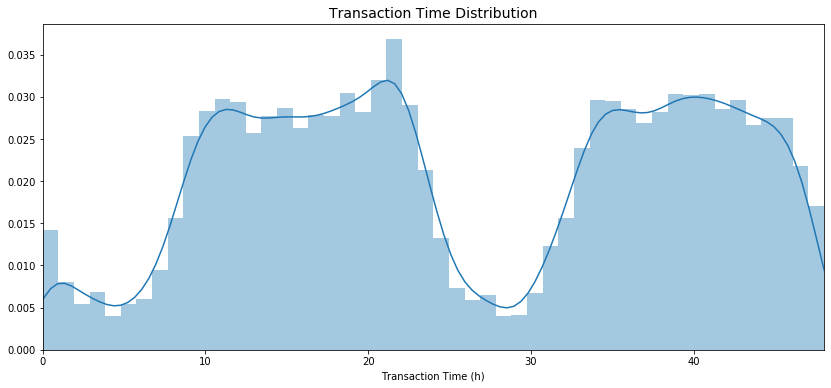

In [10]:
plt.figure(figsize=(14, 6))

#Plot Transaction Time Distribution
plt.title('Transaction Time Distribution', size=14)                   #Graph title

#Graph
sns.distplot(a=creditcard['Time'],                                    #Time data to plot
             axlabel= 'Transaction Time (h)',                         #Abscissa label
             bins=50)         
plt.xlim((min(creditcard['Time']), max(creditcard['Time'])))          #Abscissa interval to plot data

#Save the graph with plt.savefig
filepath_fig_time_distributions = os.path.join('graph', 'credit-card-transactions-time-distributions.jpg')
plt.savefig(filepath_fig_time_distributions,                          #Image path
            format='jpg',                                             #Image format to save
            bbox_inches='tight')                                      #Keep abscissa legend

plt.show()

I constat that transactions time is globaly seasonal.

In [8]:
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


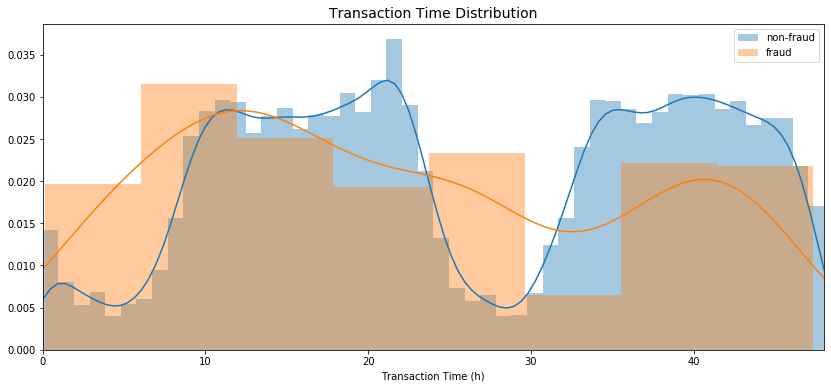

In [11]:
plt.figure(figsize=(14, 6))

#Plot Transaction Time Distribution
plt.title('Transaction Time Distribution', size=14)                   #Graph title

#Countplot for non-fraudulent Transaction Time Distribution
sns.distplot(creditcard.loc[creditcard['Time'].notnull() & (creditcard['Class'] == 0), 'Time'],
             label='non-fraud',                                       #Curve label
             axlabel= 'Transaction Time (h)')                         #Abscissa label

#Countplot for fraudulent Transaction Time Distribution
sns.distplot(creditcard.loc[creditcard['Time'].notnull() & (creditcard['Class'] == 1), 'Time'],
             label='fraud',                                           #Curve label
             axlabel= 'Transaction Time (h)')                         #Abscissa label
        
plt.xlim((min(creditcard['Time']), max(creditcard['Time'])))          #Abscissa interval to plot data
plt.legend()                                                          #Graph legend

#Save the graph with plt.savefig
filepath_fig_time_fraud_distributions = os.path.join('graph', 'credit-card-transactions-time-fraud-distributions.jpg')
plt.savefig(filepath_fig_time_fraud_distributions,                     #Image path
            format='jpg',                                             #Image format to save
            bbox_inches='tight')                                      #Keep abscissa legend

plt.show()

I notice that fraudulent transactions increase overnight.

<h3> Features correlation :

Correlation matrix graphically gives us an idea of how features correlate with each other and can help us predict what are the features that are most relevant for the prediction : 

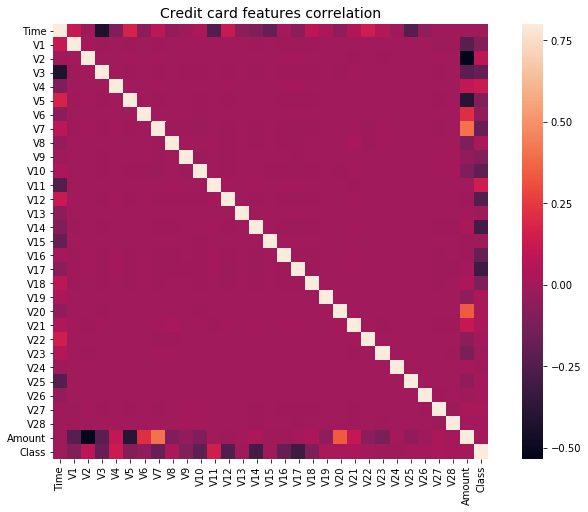

In [35]:
# Correlation matrix
correlation_matrix = creditcard.corr()

#Plot correlation matrix with heatmap
fig = plt.figure(figsize = (12, 8))
plt.title('Credit card features correlation', size=14)                #Graph title
sns.heatmap(correlation_matrix, vmax = .8, square = True)

#Save the graph with plt.savefig
filepath_fig_correlation = os.path.join('graph', 'credit-card-transactions-correlation-heatmap.jpg')
plt.savefig(filepath_fig_correlation,                                 #Image path
            format='jpg',                                             #Image format to save
            bbox_inches='tight')                                      #Keep abscissa legend
plt.show()

I can clearly see that most of the features **don't correlate to other features** but there are some features that either has a **positive or a negative correlation** with each other. For example, `V12` and `V17` are negatively correlated. 

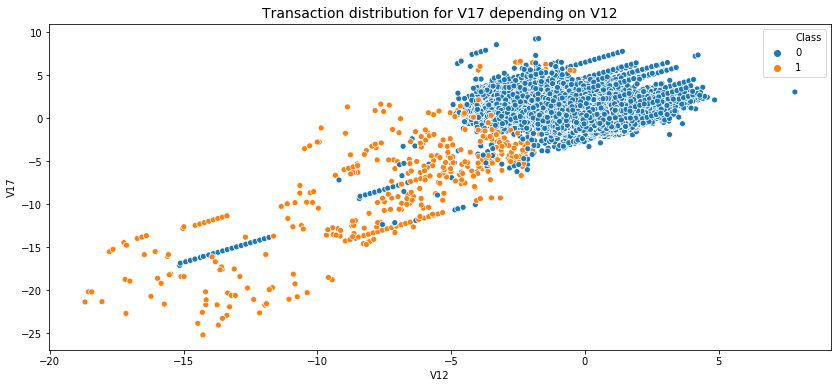

In [36]:
plt.figure(figsize=(14, 6))

#Plot Transaction distribution for V3 in terms of V1
plt.title('Transaction distribution for V17 depending on V12', fontsize=14)
sns.scatterplot(x='V12', y='V17', hue='Class', data=creditcard)

    
#Save the graph with plt.savefig
filepath_dist_v1_v3 = os.path.join('graph', 'credit-card-fraud-dist-v12-v17.jpg')
plt.savefig(filepath_dist_v1_v3,                                                        #Image path
            format='jpg',                                                               #Image format to save
            bbox_inches='tight')  
    
plt.show()

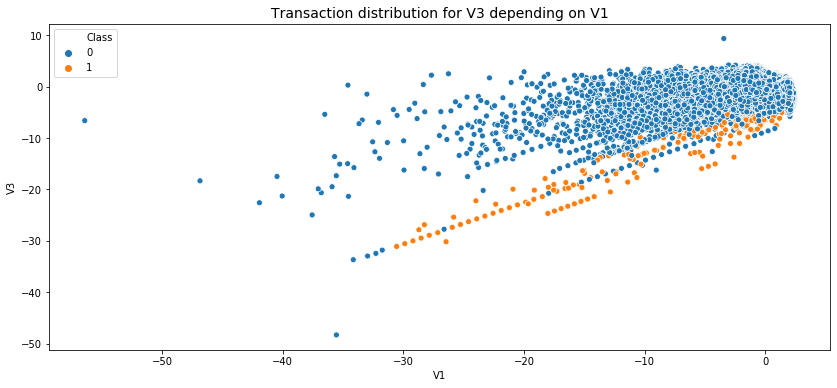

In [37]:
plt.figure(figsize=(14, 6))

#Plot Transaction distribution for V3 in terms of V1
plt.title('Transaction distribution for V3 depending on V1', fontsize=14)
sns.scatterplot(x='V1', y='V3', hue='Class', data=creditcard)

    
#Save the graph with plt.savefig
filepath_dist_v1_v3 = os.path.join('graph', 'credit-card-fraud-dist-v1-v3.jpg')
plt.savefig(filepath_dist_v1_v3,                                                        #Image path
            format='jpg',                                                               #Image format to save
            bbox_inches='tight')  
    
plt.show()

<h1> 2. Anomaly Detection

<h2> 2.1 Using Supervised Machine Learning 🤖

Firstly, I build Supervised Machine Learning model to identify fraudulent credit card transactions and secondly I use Unsupervised Machine Learning model to compare results.

<h3> 2.1.1 Features and labels definitions

I select this following features to build `X` :
- `V1`, `V2`, … `V28` : principal components obtained with PCA
- `Time` (in hours): contains the seconds elapsed between each transaction and the first transaction in the dataset. 
- `Amount` (in euros) : transaction amount

Labels are `Class` : it takes value 1 in case of fraud and 0 otherwise : it represents `y` 

In [12]:
X = creditcard.iloc[:, :30]

In [13]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [29]:
y = creditcard['Class']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [30]:
X.shape, y.shape

((283726, 30), (283726,))

I split data into **train** and **test** to build Machine Learning model with `train_test_split` method from scikit-learn :

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.2,        #train represents 80% of dataset and test represents 20% of dataset
                                                    random_state=0,      #keep the same random split     
                                                    stratify=y)          #conserve the same distributions for labels

In [32]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((226980, 30), (226980,), (56746, 30), (56746,))

<h3> 2.1.2 Scaling and oversampling to improve model performance

<h4> Data Scaling

I use a scaler to have the same scale for data, otherwise one feature will be more relevant than the other, for example transaction `Amount` is higher than `V1` (numerically).

In [33]:
#Instanciate a scaler
scaler = StandardScaler()

#Scale train and test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
X_train

array([[ 1.5382262 , -0.35232219,  0.65659326, ..., -0.09437867,
         0.07834484, -0.29690349],
       [-0.08737274,  0.66299402, -0.85955375, ..., -0.01610648,
         0.05962701,  0.96538799],
       [-1.96456675, -0.63599585,  0.86313122, ...,  1.55204966,
         1.09724454, -0.33694414],
       ...,
       [-1.12251277, -0.42483153,  0.65699021, ..., -1.75515534,
        -1.21514082, -0.31676203],
       [-0.87813921, -0.86496552, -0.09938969, ...,  0.57318945,
        -0.07551689,  0.14839703],
       [-1.94961842, -0.34697699,  0.50251513, ...,  0.66543954,
        -0.04935022, -0.35312217]])

In [35]:
X_test

array([[ 1.5310889 , -0.23586142,  0.70540469, ...,  0.09724001,
         0.35051484, -0.08250403],
       [ 0.99897058,  0.87965531, -0.59763539, ..., -0.1521426 ,
         0.01561618,  0.31822599],
       [-0.70890731, -0.46505138,  0.38250903, ...,  0.04074202,
         0.11423249, -0.16800497],
       ...,
       [ 1.39619605,  1.04410837, -0.07468128, ..., -0.26875923,
        -0.22076316, -0.20565935],
       [ 0.42623913, -0.06508158,  0.54486019, ...,  0.65664368,
         0.67607343, -0.29649904],
       [-0.52009521, -0.56571534,  0.01831875, ..., -0.12975354,
        -0.13211341, -0.27647872]])

In [36]:
#Save train and test data on local file 
filepath_creditcard_train_test = os.path.join('data', 'creditcard_train_test_scaled.pkl')

with open(filepath_creditcard_train_test, 'wb') as f:
    pickle.dump((X_train, X_test, y_train, y_test), f)

<h4> Data visualization

In [11]:
#Import train and test data on local file
filepath_creditcard_train_test = os.path.join('data', 'creditcard_train_test_scaled.pkl')

with open(filepath_creditcard_train_test, 'rb') as f:
    (X_train, X_test, y_train, y_test) = pickle.load(f)

In [14]:
#Transform array into dataframe
X_train_scaled_df = pd.DataFrame(X_train, columns=X.columns)
y_train_scaled_df = pd.DataFrame(y_train, columns=['Class'])

In [16]:
X_train_scaled_df.shape, y_train_scaled_df.shape

((226980, 30), (226980, 1))

I realize some visualization of data thank to scaling :

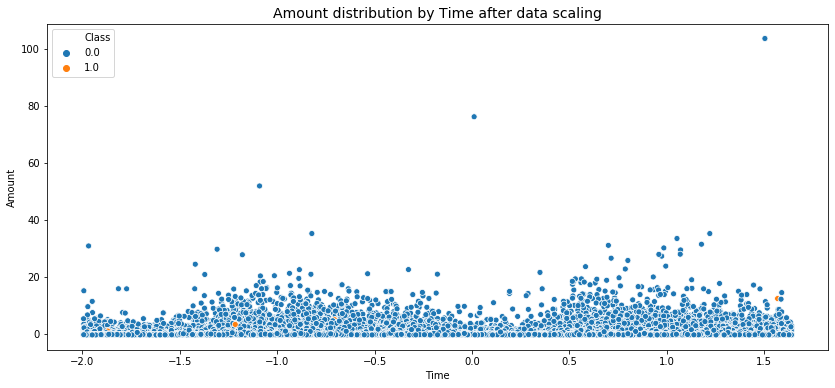

In [25]:
plt.figure(figsize=(14, 6))

#Plot Amount distribution by Time
plt.title('Amount distribution by Time after data scaling', fontsize=14)
sns.scatterplot(x='Time', y='Amount', hue=y_train, data=X_train_scaled_df)

#Save the graph with plt.savefig
filepath_dist_amount_time = os.path.join('graph', 'credit-card-fraud-dist-amount-time.jpg')
plt.savefig(filepath_dist_amount_time,                                                        #Image path
            format='jpg',                                                                     #Image format to save
            bbox_inches='tight')  

plt.show()

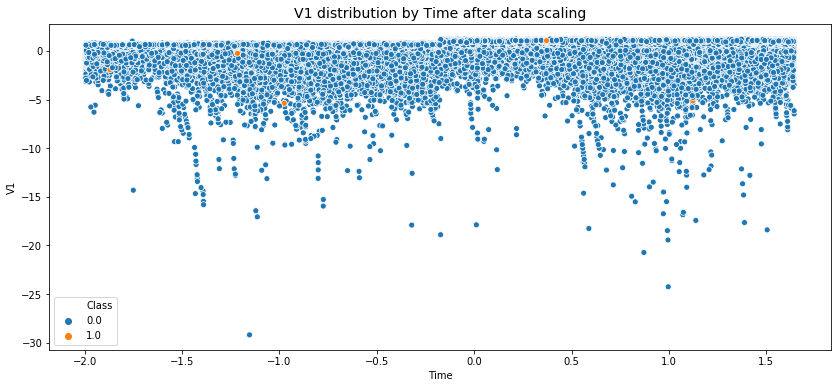

In [33]:
plt.figure(figsize=(14, 6))

#Plot V1 distribution by Time
plt.title('V1 distribution by Time after data scaling', fontsize=14)
sns.scatterplot(x='Time', y='V1', hue=y_train, data=X_train_scaled_df)

#Save the graph with plt.savefig
filepath_dist_v1_time = os.path.join('graph', 'credit-card-fraud-dist-V1-time.jpg')
plt.savefig(filepath_dist_v1_time,                                                        #Image path
            format='jpg',                                                                 #Image format to save
            bbox_inches='tight')  


plt.show()

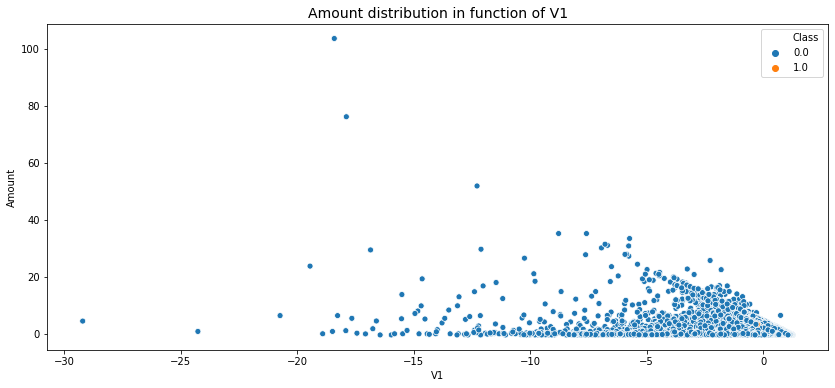

In [34]:
#Plot Amount distribution in function of V1
plt.figure(figsize=(14, 6))

plt.title('Amount distribution in function of V1', fontsize=14)
sns.scatterplot(x='V1', y='Amount', hue=y_train, data=X_train_scaled_df)

#Save the graph with plt.savefig
#filepath_dist_amount_v1 = os.path.join('graph', 'credit-card-fraud-dist-amount-V1.jpg')
#plt.savefig(filepath_dist_amount_v1,                                                        #Image path
            #format='jpg',                                                                   #Image format to save
            #bbox_inches='tight')  

plt.show()

<h4> Data oversampling

Credit card dataset is highly unbalanced. I use **oversampling** method to balance dataset and improve model performance: **SMOTE** : it consists to create data for fradulent transactions to balance labels for train data).

In [37]:
#Instanciate a SMOTE
oversampling = SMOTE()

#Balance train data
X_train, y_train = oversampling.fit_resample(X_train, y_train)

In [38]:
y_train.value_counts()

1    226602
0    226602
Name: Class, dtype: int64

In [39]:
#Transform array into dataframe
X_train_df = pd.DataFrame(X_train, columns=X.columns)
y_train_df = pd.DataFrame(y_train, columns=['Class'])

In [40]:
X_train_df.shape, y_train_df.shape

((453204, 30), (453204, 1))

I plot `Class` distribution for fraudulent and non fraudulent transactions after oversampling : 

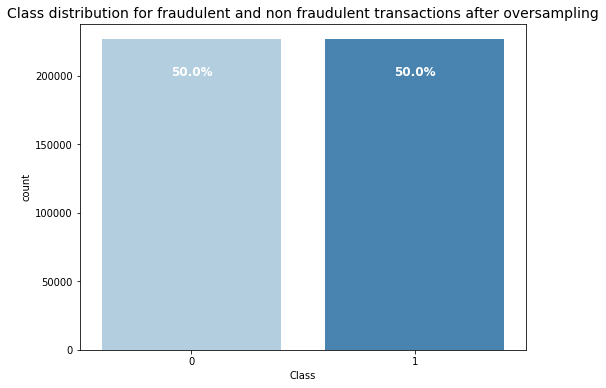

In [3]:
plt.figure(figsize=(8, 6))

#Plot the Class distributions for fraudulent and non fraudulent transactions
plt.title('Class distribution for fraudulent and non fraudulent transactions after oversampling', size=14)       #Graph title

#Countplot graph
sns.countplot(x='Class',                                                                      #Data to plot : Class    
              data=y_train_df,
              palette="Blues")                                                                

#Write the Class percentage on top
grouped_values = (y_train_df.Class.value_counts() / y_train_df.Class.shape[0]) * 100          #Compute Class percentage
for label, value in enumerate(grouped_values):
    plt.text(label,                                                                           #Class index
             value + 200000,                                                                  #Class percentage position
             str(round(value,2)) + '%',                                                       #Class percentage to print
             ha="center",                                                                     #Center Class percentage label
             fontweight='bold',                                                               #Text property
             color='white',                                                                   #Text property
             fontsize=12)                                                                     #Text property

#Save the graph with plt.savefig
filepath_fig_fraud_distributions_oversampled = os.path.join('graph', 'credit-card-fraud-transactions-distributions-oversampled.jpg')
plt.savefig(filepath_fig_fraud_distributions_oversampled,                                     #Image path
            format='jpg',                                                                     #Image format to save
            bbox_inches='tight')                                                              #Keep abscissa legend

plt.show()

<h4> Data save

In [44]:
#Save train and test data on local file 
filepath_creditcard_train_test_supervised = os.path.join('data', 'creditcard_train_test-supervisedML.pkl')

with open(filepath_creditcard_train_test_supervised, 'wb') as f:
    pickle.dump((X_train, X_test, y_train, y_test, X_train_df, y_train_df), f)

<h3> 2.1.3 Modeling

Logistic Regression, Random Forest and Gradient Boosting are models (from scikit-learn) I used to predict fraudulent transactions.

In [49]:
#Import train and test from local file
filepath_creditcard_train_test_supervised = os.path.join('data', 'creditcard_train_test-supervisedML.pkl')

with open(filepath_creditcard_train_test_supervised, 'rb') as f:
    X_train, X_test, y_train, y_test, X_train_df, y_train_df = pickle.load(f)

In [50]:
X_train.shape,y_train.shape, X_test.shape, y_test.shape

((453204, 30), (453204,), (56746, 30), (56746,))

In [51]:
y_train.value_counts()

1    226602
0    226602
Name: Class, dtype: int64

I build this function to draw prediction later :

In [19]:
def graph_prediction(X, y_true, y_pred, model):
    '''This function draw true distribution and predicted distribution transactions for V2 and V1
    
    Parameters
    ------------
    X : array of float
        data to draw
    y_true: array of int
        contains Class transactions
    y_pred: array of int
        contains predictions for fraudulent of non-fraudlent transactions
   
    Returns
    ------------
    Predictions graph
    '''
    fig = plt.figure(figsize=(14, 6))

    fig.add_subplot(121)
    #Plot True distribution V2=f(V1)
    plt.title('True distribution for credit card fraud detection : V2=f(V1)', fontsize=14)
    plt.scatter(X[:, 1], X[:, 2], c=y_true)
    plt.xlabel('V1')
    plt.ylabel('V2')

    fig.add_subplot(122)
    #Plot Predicted distribution V2=f(V1)
    plt.title('Predicted distribution for credit card fraud detection V2=f(V1)', fontsize=14)
    plt.scatter(X[:, 1], X[:, 2], c=y_pred)
    plt.xlabel('V1')
    plt.ylabel('V2')
    
    #Save the graph with plt.savefig
    filepath_prediction = os.path.join('graph', f'credit-card-fraud-prediction-{model}.jpg')
    plt.savefig(filepath_prediction,                                                     #Image path
            format='jpg',                                                                #Image format to save
            bbox_inches='tight')  
    
    plt.show()

<h4> Logistic Regression

In [114]:
def get_logistic_regression(C=1.0):
    '''
    This function predicts Class transactions with Logistic Regression model
    
    Parameters
    ------------
    C : float, default=1.0
        Inverse of regularization strength; must be a positive float.
        Like in support vector machines, smaller values specify stronger
        regularization.
        
    Returns
    ------------
    y_pred : array of int
        contains predictions for fraudulent of non-fraudlent transactions
    y_pred_proba : array of int
        contains the probability of the predicted class
    '''
    #Instanciate model
    lr = LogisticRegression(C=C)
    
    #Model fitting
    print('Logistic Regression time to fit :')
    %time
    lr.fit(X_train, y_train)

    #Model predictions
    print('\n Logistic Regression time to predict y :')
    %time
    y_pred = lr.predict(X_test)
    print('\n Logistic Regression time to predict y proba :')
    %time
    y_pred_proba = lr.predict_proba(X_test)

    return y_pred, y_pred_proba

In [6]:
#Prediction for C=1.0
y_pred_lr, y_pred_proba_lr = get_logistic_regression(C=1.0)

Logistic Regression time to fit :
CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.11 µs

 Logistic Regression time to predict y :
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.39 µs

 Logistic Regression time to predict y proba :
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs


In [7]:
#Compute accuracy score C=1.0
acc_lr = round(accuracy_score(y_test, y_pred_lr), 4) * 100
acc_lr

97.23

In [8]:
#Compute score for C=1.0
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56651
           1       0.05      0.91      0.10        95

    accuracy                           0.97     56746
   macro avg       0.53      0.94      0.54     56746
weighted avg       1.00      0.97      0.98     56746



Recall of LR (`C=1.0`) is 91% but precision is 5% : LR (`C=1.0`) is not adapted to detect fraudulent transactions.

In [8]:
print(int(y_pred_lr.sum()), "transactions classified as fraudulent out of", y_test.sum())

1651 transactions classified as fraudulent out of 95


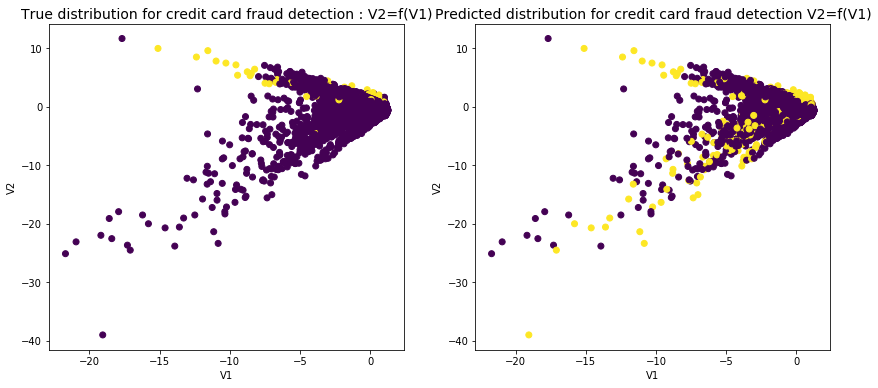

In [111]:
graph_prediction(X_test, y_test, y_pred_lr, 'lr-c-10')

LR (`C=1.0`) overfits.

In [9]:
#Prediction for C=0.1
y_pred_lr_c_01, y_pred_proba_lr_c_01 = get_logistic_regression(C=0.1)

Logistic Regression time to fit :
CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 9.78 µs

 Logistic Regression time to predict y :
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs

 Logistic Regression time to predict y proba :
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


In [10]:
#Compute accuracy score for C=0.1
acc_lr_c_01 = round(accuracy_score(y_test, y_pred_lr_c_01), 4) * 100
acc_lr_c_01

97.24000000000001

In [11]:
#Compute score for C=0.1
print(classification_report(y_test, y_pred_lr_c_01))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56651
           1       0.05      0.91      0.10        95

    accuracy                           0.97     56746
   macro avg       0.53      0.94      0.54     56746
weighted avg       1.00      0.97      0.98     56746



Recall of LR (`C=0.1`) is 91% but precision is 5% : LR (`C=0.1`) is not adapted to detect fraudulent transactions.

In [9]:
print(int(y_pred_lr_c_01.sum()), "transactions classified as fraudulent out of", y_test.sum())

1646 transactions classified as fraudulent out of 95


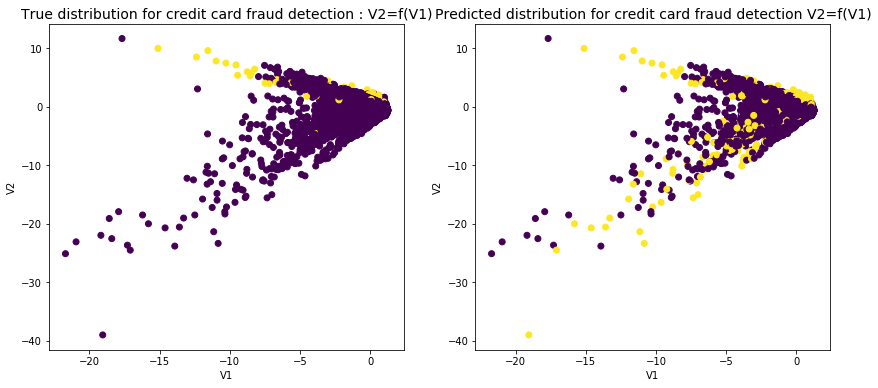

In [112]:
graph_prediction(X_test, y_test, y_pred_lr_c_01, 'lr-c-01')

LR (`C=.01`) overfits.

In [12]:
#Prediction for C=0.01
y_pred_lr_c_001, y_pred_proba_lr_c_001 = get_logistic_regression(C=0.01)

Logistic Regression time to fit :
CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 12.6 µs

 Logistic Regression time to predict y :
CPU times: user 11 µs, sys: 1 µs, total: 12 µs
Wall time: 8.11 µs

 Logistic Regression time to predict y proba :
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


In [23]:
#Compute accuracy score for C=0.01
acc_lr_c_001 = round(accuracy_score(y_test, y_pred_lr_c_001), 4) * 100
acc_lr_c_001

97.26

In [24]:
#Compute score for C=0.01
print(classification_report(y_test, y_pred_lr_c_001))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56651
           1       0.05      0.91      0.10        95

    accuracy                           0.97     56746
   macro avg       0.53      0.94      0.54     56746
weighted avg       1.00      0.97      0.98     56746



Recall of LR (`C=0.01`) is 91% but precision is 5% : LR (`C=0.01`) is not adapted to detect fraudulent transactions.

In [10]:
print(int(y_pred_lr_c_01.sum()), "transactions classified as fraudulent out of", y_test.sum())

1646 transactions classified as fraudulent out of 95


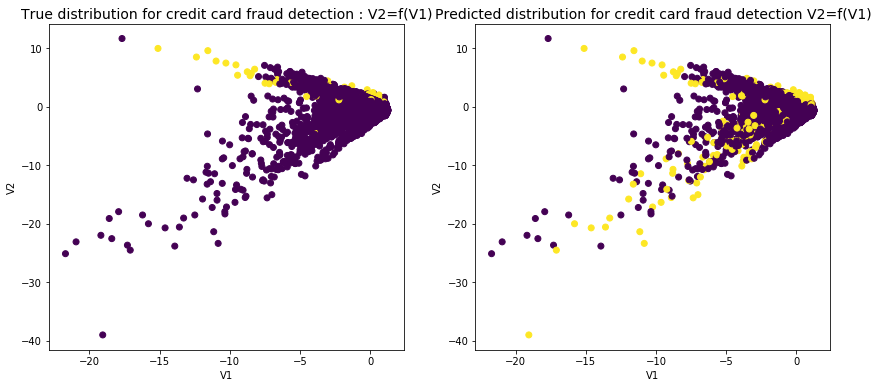

In [98]:
graph_prediction(X_test, y_test, y_pred_lr_c_001, 'lr_c_001')

LR (`C=0.001`) overfits.

In [115]:
#Prediction for C=10
y_pred_lr_ten, y_pred_proba_lr_ten = get_logistic_regression(C=10)

Logistic Regression time to fit :
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs

 Logistic Regression time to predict y :
CPU times: user 12 µs, sys: 0 ns, total: 12 µs
Wall time: 8.11 µs

 Logistic Regression time to predict y proba :
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


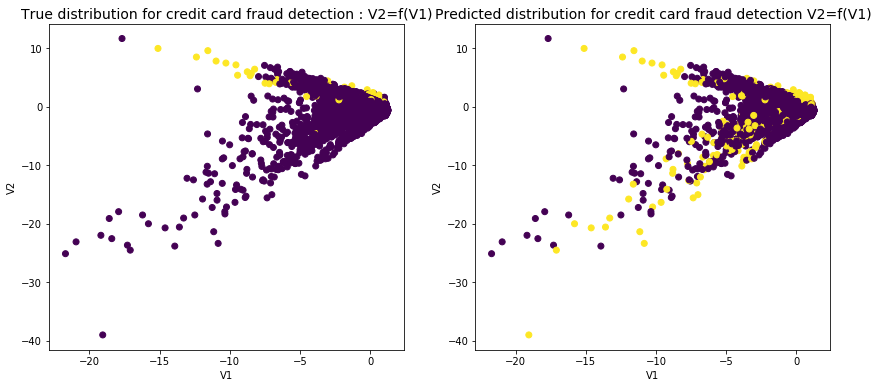

In [117]:
graph_prediction(X_test, y_test, y_pred_lr_ten, 'lr_c_ten')

<h5> ROC Curve

In [15]:
#Compute ROC characteristic
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test, y_pred_proba_lr[:, 1])
fpr_lr_c_01, tpr_lr_c_01, threshold_lr_c_01 = roc_curve(y_test, y_pred_proba_lr_c_01[:, 1])
fpr_lr_c_001, tpr_lr_c_001, threshold_lr_c_001 = roc_curve(y_test, y_pred_proba_lr_c_001[:, 1])

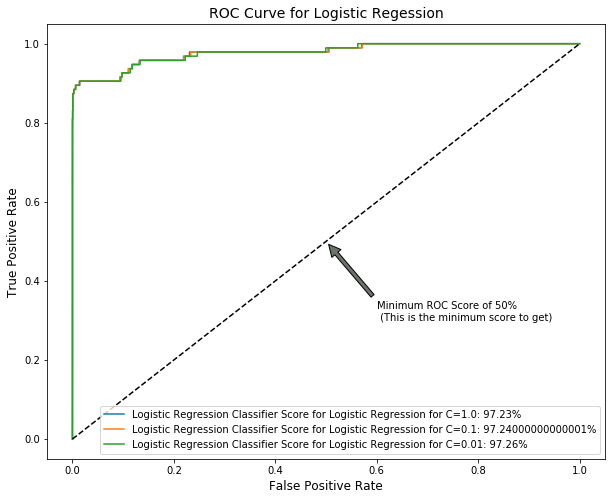

In [46]:
plt.figure(figsize=(10, 8))

#Plot ROC Curve for Logistic Regression
plt.title('ROC Curve for Logistic Regession', fontsize=14)                               #ROC Curve graph Title

#Plot ROC Curve for Logistic Regression for C=1.0
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression Classifier Score for Logistic Regression for C=1.0: {acc_lr}%')

#Plot ROC Curve for Logistic Regression for C=0.1
plt.plot(fpr_lr_c_01, tpr_lr_c_01, label=f'Logistic Regression Classifier Score for Logistic Regression for C=0.1: {acc_lr_c_01}%')   

#Plot ROC Curve for Logistic Regression for C=0.01
plt.plot(fpr_lr_c_001, tpr_lr_c_001, label=f'Logistic Regression Classifier Score for Logistic Regression for C=0.01: {acc_lr_c_001}%')

#Plot ROC Curve limited score
plt.plot([0, 1], [0, 1], 'k--')
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)',           #Plot arrow legend
             xy=(0.5, 0.5),                                                              #The point *(x,y)* to annotate.
             xytext=(0.6, 0.3),                                                          #The position *(x,y)* to place the text at.
             arrowprops=dict(facecolor='#6E726D', shrink=0.05))                          #The properties used to draw a arrow between the positions *xy* and *xytext*.     

#Graph property
plt.xlabel('False Positive Rate', fontsize=12)                                           #Abscissa label
plt.ylabel('True Positive Rate', fontsize=12)                                            #Ordinate label
plt.legend(loc='lower right')                                                            #Graph Legend

#Save the graph with plt.savefig
filepath_roc_curve_lr = os.path.join('graph', 'credit-card-fraud-roc-curve-lr.jpg')
plt.savefig(filepath_roc_curve_lr,                                                       #Image path
            format='jpg',                                                                #Image format to save
            bbox_inches='tight')                                                         #Keep abscissa legend


plt.show()

##### Save data

In [17]:
#Save Logistic Regression on local file 
filepath_creditcard_lr_c_10 = os.path.join('data', 'creditcard_lr_c_10.pkl')
with open(filepath_creditcard_lr_c_10, 'wb') as f:
    pickle.dump((y_pred_lr, y_pred_proba_lr, fpr_lr, tpr_lr, threshold_lr), f)

filepath_creditcard_lr_c_01 = os.path.join('data', 'creditcard_lr_c_01.pkl')
with open(filepath_creditcard_lr_c_01, 'wb') as f:
    pickle.dump((y_pred_lr_c_01, y_pred_proba_lr_c_01, fpr_lr_c_01, tpr_lr_c_01, threshold_lr_c_01), f)
    
filepath_creditcard_lr_c_001 = os.path.join('data', 'creditcard_lr_c_001.pkl')
with open(filepath_creditcard_lr_c_001, 'wb') as f:
    pickle.dump((y_pred_lr_c_001, y_pred_proba_lr_c_001, fpr_lr_c_001, tpr_lr_c_001, threshold_lr_c_001), f)

In [60]:
#Import Logistic Regression on local file 
filepath_creditcard_lr_c_10 = os.path.join('data', 'creditcard_lr_c_10.pkl')
with open(filepath_creditcard_lr_c_10, 'rb') as f:
    y_pred_lr, y_pred_proba_lr, fpr_lr, tpr_lr, threshold_lr = pickle.load(f)

filepath_creditcard_lr_c_01 = os.path.join('data', 'creditcard_lr_c_01.pkl')
with open(filepath_creditcard_lr_c_01, 'rb') as f:
    y_pred_lr_c_01, y_pred_proba_lr_c_01, fpr_lr_c_01, tpr_lr_c_01, threshold_lr_c_01 = pickle.load(f)
    
filepath_creditcard_lr_c_001 = os.path.join('data', 'creditcard_lr_c_001.pkl')
with open(filepath_creditcard_lr_c_001, 'rb') as f:
    y_pred_lr_c_001, y_pred_proba_lr_c_001, fpr_lr_c_001, tpr_lr_c_001, threshold_lr_c_001 = pickle.load(f)

<h4> Random Forest Classifier

In [18]:
def get_random_forest_classifier(n_estimators=100, max_depth=50):
    '''
    This function predicts Class transactions with Random Forest Classifier model
    
    Parameters
    ------------
    n_estimators : integer, optional (default=100)
        The number of trees in the forest.
    max_depth : integer or None, optional (default=50)
        The maximum depth of the tree. 
        
    Returns
    ------------
    y_pred : array of int
        contains predictions for fraudulent of non-fraudlent transactions
    y_pred_proba : array of int
        contains the probability of the predicted class
    '''
    #Instanciate model
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    
    #Model fitting
    print('Random Forest Classifier time to fit :')
    %time
    rf.fit(X_train, y_train)

    #Model predictions
    print('\n Random Forest Classifier time to predict y :')
    %time
    y_pred = rf.predict(X_test)
    print('\n Random Forest Classifier time to predict y proba :')
    %time
    y_pred_proba = rf.predict_proba(X_test)

    return y_pred, y_pred_proba

In [19]:
#Prediction for n_estimators=100, max_depth=50
y_pred_rf, y_pred_proba_rf = get_random_forest_classifier(n_estimators=100, max_depth=50)

Random Forest Classifier time to fit :
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs

 Random Forest Classifier time to predict y :
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs

 Random Forest Classifier time to predict y proba :
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


In [20]:
#Compute accuracy score for n_estimators=100, max_depth=50
acc_rf = round(accuracy_score(y_test, y_pred_rf), 4) * 100
acc_rf

99.96000000000001

In [21]:
#Compute score for n_estimators=100, max_depth=50
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.91      0.83      0.87        95

    accuracy                           1.00     56746
   macro avg       0.95      0.92      0.93     56746
weighted avg       1.00      1.00      1.00     56746



Recall of RFC (`n_estimators=100, max_depth=50`) is 83% and precision is 91% : This model detects fraudulent transactions.

In [14]:
print(int(y_pred_rf.sum()), "transactions classified as fraudulent out of", y_test.sum())

87 transactions classified as fraudulent out of 95


In [22]:
#Prediction for n_estimators=100, max_depth=None
y_pred_rf_depth_none, y_pred_proba_rf_depth_none = get_random_forest_classifier(n_estimators=100, max_depth=None)

Random Forest Classifier time to fit :
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs

 Random Forest Classifier time to predict y :
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs

 Random Forest Classifier time to predict y proba :
CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.82 µs


In [26]:
#Compute accuracy score for n_estimators=100, max_depth=None
acc_rf_depth_none = round(accuracy_score(y_test, y_pred_rf_depth_none), 4) * 100
acc_rf_depth_none

99.96000000000001

In [27]:
#Compute score for n_estimators=100, max_depth=None
print(classification_report(y_test, y_pred_rf_depth_none))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.94      0.83      0.88        95

    accuracy                           1.00     56746
   macro avg       0.97      0.92      0.94     56746
weighted avg       1.00      1.00      1.00     56746



Recall of RFC (`n_estimators=100, max_depth=None`) is 83% and precision is 94% : This model detects fraudulent transactions.

In [15]:
print(int(y_pred_rf_depth_none.sum()), "transactions classified as fraudulent out of", y_test.sum())

84 transactions classified as fraudulent out of 95


In [28]:
#Prediction for n_estimators=50, max_depth=None
y_pred_rf_est_50, y_pred_proba_rf_est_50 = get_random_forest_classifier(n_estimators=50, max_depth=None)

Random Forest Classifier time to fit :
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs

 Random Forest Classifier time to predict y :
CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 7.63 µs

 Random Forest Classifier time to predict y proba :
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs


In [30]:
#Compute accuracy score for n_estimators=50, max_depth=None
acc_rf_est_50 = round(accuracy_score(y_test, y_pred_rf_est_50), 4) * 100
acc_rf_est_50

99.96000000000001

In [31]:
#Compute score for n_estimators=50, max_depth=None
print(classification_report(y_test, y_pred_rf_est_50))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.92      0.83      0.87        95

    accuracy                           1.00     56746
   macro avg       0.96      0.92      0.94     56746
weighted avg       1.00      1.00      1.00     56746



Recall of RFC (`n_estimators=100, max_depth=50`) is 83% and precision is 92% : This model detects fraudulent transactions.

In [16]:
print(int(y_pred_rf_est_50.sum()), "transactions classified as fraudulent out of", y_test.sum())

86 transactions classified as fraudulent out of 95


<h5> ROC Curve

In [32]:
#Compute ROC characteristic
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test, y_pred_proba_rf[:, 1])
fpr_rf_depth_none, tpr_rf_depth_none, threshold_rf_depth_none = roc_curve(y_test, y_pred_proba_rf_depth_none[:, 1])
fpr_rf_est_50, tpr_rf_est_50, threshold_rf_est_50 = roc_curve(y_test, y_pred_proba_rf_est_50[:, 1])

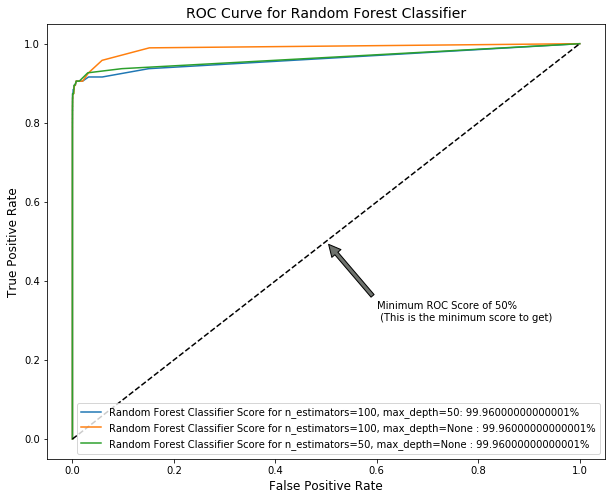

In [30]:
plt.figure(figsize=(10, 8))

#Plot ROC Curve for Random Forest Classifier 
plt.title('ROC Curve for Random Forest Classifier', fontsize=14)                         #ROC Curve graph Title

#Plot ROC Curve for Random Forest Classifier for n_estimators=100, max_depth=50
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest Classifier Score for n_estimators=100, max_depth=50: {acc_rf}%')           

#Plot ROC Curve for Random Forest Classifier for n_estimators=100, max_depth=None
plt.plot(fpr_rf_depth_none, tpr_rf_depth_none, label=f'Random Forest Classifier Score for n_estimators=100, max_depth=None : {acc_rf_depth_none}%')           

#Plot ROC Curve for Random Forest Classifier for n_estimators=50, max_depth=None
plt.plot(fpr_rf_est_50, tpr_rf_est_50, label=f'Random Forest Classifier Score for n_estimators=50, max_depth=None : {acc_rf_est_50}%')            

#Plot ROC Curve limited score
plt.plot([0, 1], [0, 1], 'k--')
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)',           #Plot arrow legend
             xy=(0.5, 0.5),                                                              #The point *(x,y)* to annotate.
             xytext=(0.6, 0.3),                                                          #The position *(x,y)* to place the text at.
             arrowprops=dict(facecolor='#6E726D', shrink=0.05))                          #The properties used to draw a arrow between the positions *xy* and *xytext*.     

#Graph properties
plt.xlabel('False Positive Rate', fontsize=12)                                           #Abscissa label
plt.ylabel('True Positive Rate', fontsize=12)                                            #Ordinate label
plt.legend(loc='lower right')                                                            #Graph Legend

#Save the graph with plt.savefig
filepath_roc_curve_rf = os.path.join('graph', 'credit-card-fraud-roc-curve-rf.jpg')
plt.savefig(filepath_roc_curve_rf,                                                       #Image path
            format='jpg',                                                                #Image format to save
            bbox_inches='tight')                                                         #Keep abscissa legend


plt.show()

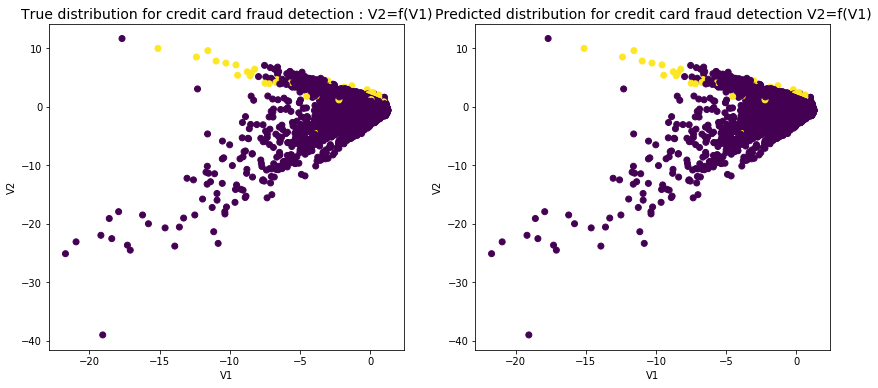

In [100]:
graph_prediction(X_test, y_test, y_pred_rf_depth_none, 'rf')

##### Save data

In [33]:
#Save Random Forest on local file 
filepath_creditcard_rf = os.path.join('data', 'creditcard_rf.pkl')
with open(filepath_creditcard_rf, 'wb') as f:
    pickle.dump((y_pred_rf, y_pred_proba_rf, fpr_rf, tpr_rf, threshold_rf), f)

filepath_creditcard_rf_depth_none = os.path.join('data', 'creditcard_rf_depth_none.pkl')
with open(filepath_creditcard_rf_depth_none, 'wb') as f:
    pickle.dump((y_pred_rf_depth_none, y_pred_proba_rf_depth_none, fpr_rf_depth_none, tpr_rf_depth_none, threshold_rf_depth_none), f)

filepath_creditcard_rf_est_50 = os.path.join('data', 'creditcard_rf_est_50.pkl')
with open(filepath_creditcard_rf_est_50, 'wb') as f:
    pickle.dump((y_pred_rf_est_50, y_pred_proba_rf_est_50, fpr_rf_est_50, tpr_rf_est_50, threshold_rf_est_50), f)

In [61]:
#Import Random Forest from local file 
filepath_creditcard_rf = os.path.join('data', 'creditcard_rf.pkl')
with open(filepath_creditcard_rf, 'rb') as f:
    y_pred_rf, y_pred_proba_rf, fpr_rf, tpr_rf, threshold_rf = pickle.load(f)

filepath_creditcard_rf_depth_none = os.path.join('data', 'creditcard_rf_depth_none.pkl')
with open(filepath_creditcard_rf_depth_none, 'rb') as f:
    y_pred_rf_depth_none, y_pred_proba_rf_depth_none, fpr_rf_depth_none, tpr_rf_depth_none, threshold_rf_depth_none = pickle.load(f)

filepath_creditcard_rf_est_50 = os.path.join('data', 'creditcard_rf_est_50.pkl')
with open(filepath_creditcard_rf_est_50, 'rb') as f:
    y_pred_rf_est_50, y_pred_proba_rf_est_50, fpr_rf_est_50, tpr_rf_est_50, threshold_rf_est_50 = pickle.load(f)

<h4> Gradient Boosting Classifier

In [47]:
def get_gradient_boosting(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=0):
    '''
    This function predicts Class transactions with Gradient Boosting Classifier model
    
    Parameters
    ------------
    learning_rate : float, optional (default=0.1)
        learning rate shrinks the contribution of each tree by `learning_rate`.
        There is a trade-off between learning_rate and n_estimators.
    n_estimators : int (default=100)
        The number of boosting stages to perform. Gradient boosting
        is fairly robust to over-fitting so a large number usually
        results in better performance.
    max_depth : integer, optional (default=3)
        maximum depth of the individual regression estimators. The maximum
        depth limits the number of nodes in the tree.
    random_state : int,
        RandomState instance or None, optional (default=0)
          
    Returns
    ------------
    y_pred : array of int
        contains predictions for fraudulent of non-fraudlent transactions
    y_pred_proba : array of int
        contains the probability of the predicted class
    '''
    #Instanciate model
    boost = GradientBoostingClassifier(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
    
    #Model fitting
    print('Gradient Boosting Classifier time to fit :')
    %time
    boost.fit(X_train, y_train)

    #Model predictions
    print('\nGradient Boosting Classifier time to predict y :')
    %time
    y_pred = boost.predict(X_test)
    print('\nGradient Boosting Classifier time to predict y proba :')
    %time
    y_pred_proba = boost.predict_proba(X_test)

    return y_pred, y_pred_proba

In [52]:
#Prediction for learning_rate=0.1, n_estimators=100, max_depth=3, random_state=0
y_pred_boost, y_pred_proba_boost = get_gradient_boosting()

Gradient Boosting Classifier time to fit :
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs

Gradient Boosting Classifier time to predict y :
CPU times: user 15 µs, sys: 0 ns, total: 15 µs
Wall time: 14.1 µs

Gradient Boosting Classifier time to predict y proba :
CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 9.78 µs


GB computation time : 30 min

In [54]:
#Compute accuracy score for learning_rate=0.1, n_estimators=100, max_depth=3, random_state=0
acc_boost = round(accuracy_score(y_test, y_pred_boost), 4) * 100
acc_boost

98.44000000000001

In [55]:
#Compute score for learning_rate=0.1, n_estimators=100, max_depth=3, random_state=0
print(classification_report(y_test, y_pred_boost))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.09      0.91      0.16        95

    accuracy                           0.98     56746
   macro avg       0.54      0.94      0.58     56746
weighted avg       1.00      0.98      0.99     56746



**Result**: This model is not adequate to detect fraudulent transaction because f1_score is lower (`f1_score=16%`) : it is not at all precise.

In [59]:
print(int(y_pred_boost.sum()), "transactions classified as fraudulent out of", y_test.sum())

964 transactions classified as fraudulent out of 95


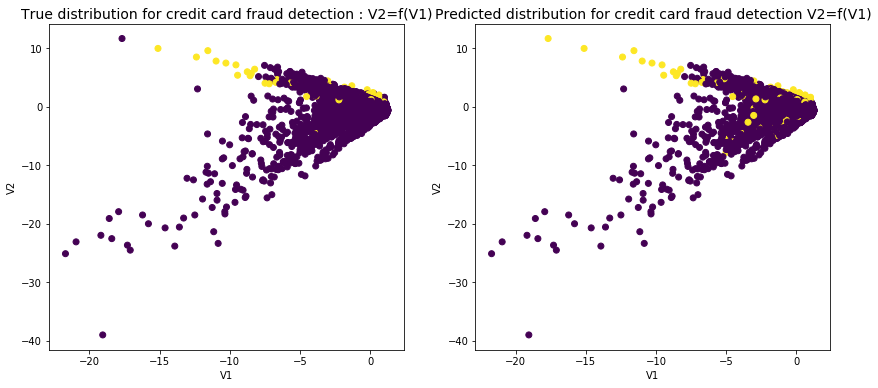

In [56]:
graph_prediction(X_test, y_test, y_pred_boost, 'boost')

<h5> ROC Curve

In [57]:
#Compute ROC characteristic
fpr_boost, tpr_boost, threshold_boost = roc_curve(y_test, y_pred_proba_boost[:, 1])

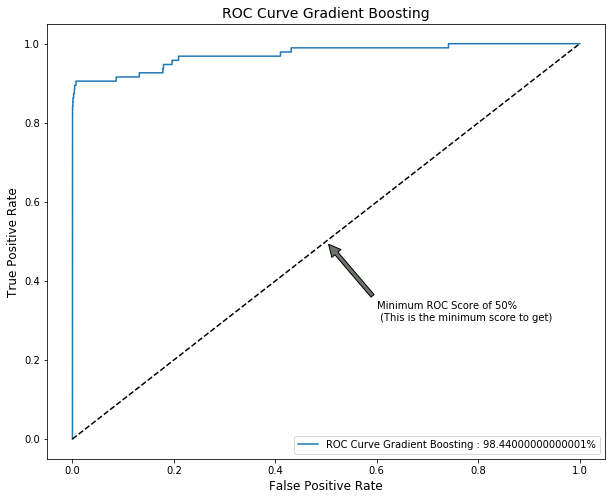

In [58]:
#Plot ROC Curve
graph_roc_curve((10, 8), 'ROC Curve Gradient Boosting', fpr_boost, tpr_boost, 'ROC Curve Gradient Boosting', acc_boost, 'boost')

In [62]:
#Save Gradient Boosting on local file 
filepath_creditcard_gb = os.path.join('data', 'creditcard_gb.pkl')
with open(filepath_creditcard_gb, 'wb') as f:
    pickle.dump((y_pred_boost, y_pred_proba_boost, fpr_boost, tpr_boost, threshold_boost, acc_boost), f)

<h4> Conclusion

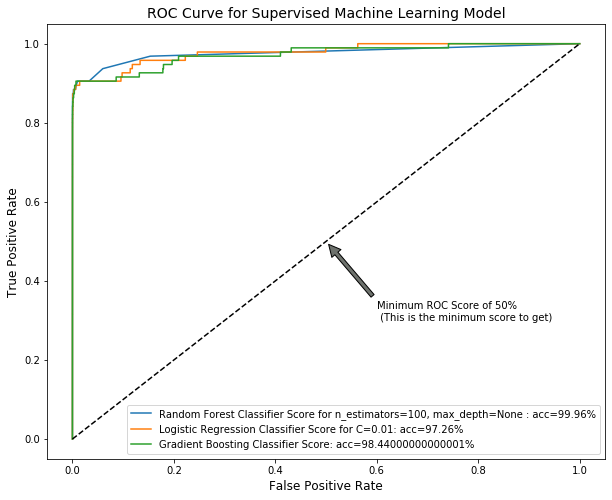

In [65]:
plt.figure(figsize=(10, 8))

#Plot ROC Curve for Supervised Machine Learning Model
plt.title('ROC Curve for Supervised Machine Learning Model', fontsize=14)                #ROC Curve graph Title

#Plot ROC Curve for Random Forest Classifier for n_estimators=100, max_depth=None
plt.plot(fpr_rf_depth_none, tpr_rf_depth_none, label=f'Random Forest Classifier Score for n_estimators=100, max_depth=None : acc=99.96%')           

#Plot ROC Curve for Logistic Regression for C=0.01
plt.plot(fpr_lr_c_001, tpr_lr_c_001, label=f'Logistic Regression Classifier Score for C=0.01: acc=97.26%')

#Plot ROC Curve for Gradient Boosting
plt.plot(fpr_boost, tpr_boost, label=f'Gradient Boosting Classifier Score: acc={acc_boost}%')

#Plot ROC Curve limited score
plt.plot([0, 1], [0, 1], 'k--')
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)',           #Plot arrow legend
             xy=(0.5, 0.5),                                                              #The point *(x,y)* to annotate.
             xytext=(0.6, 0.3),                                                          #The position *(x,y)* to place the text at.
             arrowprops=dict(facecolor='#6E726D', shrink=0.05))                          #The properties used to draw a arrow between the positions *xy* and *xytext*.     

#Graph property
plt.xlabel('False Positive Rate', fontsize=12)                                           #Abscissa label
plt.ylabel('True Positive Rate', fontsize=12)                                            #Ordinate label
plt.legend(loc='lower right')                                                            #Graph Legend

#Save the graph with plt.savefig
filepath_roc_curve_supervised = os.path.join('graph', 'credit-card-fraud-roc-supervisedML.jpg')
plt.savefig(filepath_roc_curve_supervised,                                            #Image path
            format='jpg',                                                                #Image format to save
            bbox_inches='tight')                                                         #Keep abscissa legend


plt.show()

<h2> 2.2 Using Unsupervised Machine Learning 🤖

I import data scaled from the last part and I use unsupervised Machine Learning Model :

In [5]:
#Import train and test data on local file
filepath_creditcard_train_test = os.path.join('data', 'creditcard_train_test_scaled.pkl')

with open(filepath_creditcard_train_test, 'rb') as f:
    (X_train, X_test, y_train, y_test) = pickle.load(f)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((226980, 30), (56746, 30), (226980,), (56746,))

In [7]:
y_train.value_counts()

0    226602
1       378
Name: Class, dtype: int64

In [8]:
y_test.value_counts()

0    56651
1       95
Name: Class, dtype: int64

In this part, I use Gaussian Distribution based, Local Outlier Factor and Isolation Forest to detect fraudulent transactions. 
I reduce my data to non fraudulent transactions to fit Anomaly Detection models.

In [9]:
X_train = X_train[y_train==0]
X_train.shape

(226602, 30)

<h3> 2.2.1 Gaussian Distribution based

In [8]:
def get_gaussian_distribution_based():
    '''
    This function predicts Class transactions with Gaussian Distribution based model
    
    Parameters
    ------------

    Returns
    ------------
    y_pred : array of int
        contains predictions for fraudulent of non-fraudlent transactions
    y_pred_proba : array of int
        contains the probability of the predicted class
    '''
    #Instanciate model
    covariance = EllipticEnvelope(random_state=0, support_fraction=1)
    
    #Model fitting
    print('Gaussian Distribution based time to fit :')
    %time
    covariance.fit(X_train)

    #Model predictions
    print('\nGaussian Distribution based time to predict y :')
    %time
    y_pred = covariance.predict(X_test)
    print('\nGaussian Distribution based time to predict y proba :')
    %time
    y_pred_proba = covariance.score_samples(X_test)
    return y_pred, y_pred_proba

In [9]:
#Prediction :
y_pred_covariance, y_pred_proba = get_gaussian_distribution_based()

Gaussian Distribution based time to fit :
CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 12.9 µs

Gaussian Distribution based time to predict y :
CPU times: user 13 µs, sys: 0 ns, total: 13 µs
Wall time: 12.2 µs

Gaussian Distribution based time to predict y proba :
CPU times: user 12 µs, sys: 0 ns, total: 12 µs
Wall time: 8.34 µs


In [10]:
#Predict returns 1 for an inlier and -1 for an outlier
y_pred_covariance[y_pred_covariance == 1] = 0
y_pred_covariance[y_pred_covariance == -1] = 1

In [11]:
#Compute accuracy_score
acc_cov = round(accuracy_score(y_test, y_pred_covariance) * 100, 4)
acc_cov

89.7032

In [12]:
#Compute different score
print(classification_report(y_test, y_pred_covariance))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     56651
           1       0.01      0.86      0.03        95

    accuracy                           0.90     56746
   macro avg       0.51      0.88      0.49     56746
weighted avg       1.00      0.90      0.94     56746



**Result**: Recall of Gaussian Distribution Based is 86% but precision is 1% : Gaussian Distribution Based is not adapted to detect fraudulent transactions (`f1_score=3%`).

In [ ]:
graph_prediction(X_test, y_test, y_pred_covariance, 'gdb')

In [44]:
print(int(y_pred_covariance.sum()), "transactions classified as fraudulent out of", y_test.sum())

5912 transactions classified as fraudulent out of 95


I constat that Gaussian Distribution based model overfit.

<h4> ROC Curve

In [11]:
def graph_roc_curve(figsize, title, fpr, tpr, label, accuracy, model_name):
    '''
    This function draw a ROC Curve
    
    Parameters
    ------------
    figsize : tuple of int
        figure dimension
    title : str
        Graph title
    fpr : array, shape = [>2]
        Increasing false positive rates such that element i is the false
        positive rate of predictions with score >= thresholds[i].
    tpr :array, shape = [>2]
        Increasing true positive rates such that element i is the true
        positive rate of predictions with score >= thresholds[i].
    label : str
        Graph label
    accuracy : float
        accuracy_score
    model_name : str
        model name to save figure

    Returns
    ------------
    y_pred : array of int
        contains predictions for fraudulent of non-fraudlent transactions
    y_pred_proba : array of int
        contains the probability of the predicted class
    '''
    plt.figure(figsize=figsize)

    #Plot ROC Curve for Supervised Machine Learning Model
    plt.title(title, fontsize=14)                                                        #ROC Curve graph Title

    #Plot ROC Curve
    plt.plot(fpr, tpr, label=f'{label} : {accuracy}%')           

    #Plot ROC Curve limited score
    plt.plot([0, 1], [0, 1], 'k--')
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)',       #Plot arrow legend
             xy=(0.5, 0.5),                                                              #The point *(x,y)* to annotate.
             xytext=(0.6, 0.3),                                                          #The position *(x,y)* to place the text at.
             arrowprops=dict(facecolor='#6E726D', shrink=0.05))                          #The properties used to draw a arrow between the positions *xy* and *xytext*.     

    #Graph property
    plt.xlabel('False Positive Rate', fontsize=12)                                       #Abscissa label
    plt.ylabel('True Positive Rate', fontsize=12)                                        #Ordinate label
    plt.legend(loc='lower right')                                                        #Graph Legend
    
    #Save the graph with plt.savefig
    filepath_roc_curve = os.path.join('graph', f'credit-card-fraud-roc-{model_name}.jpg')
    plt.savefig(filepath_roc_curve,                                                      #Image path
            format='jpg',                                                                #Image format to save
            bbox_inches='tight')   
    
    plt.show()

In [16]:
#Compute ROC characteristic
fpr_cov, tpr_cov, threshold_cov = roc_curve(y_test, y_pred_covariance)

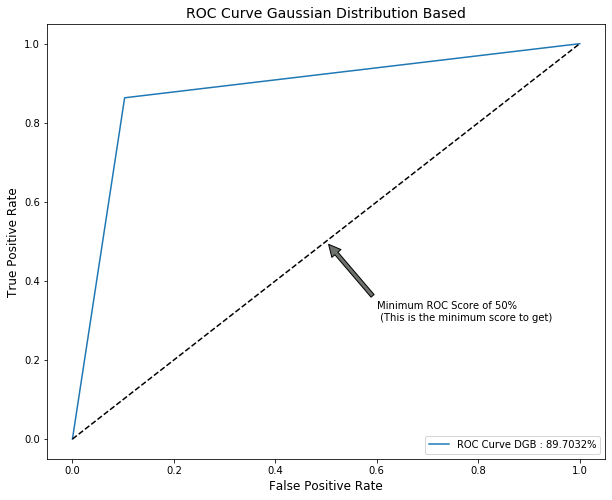

In [18]:
#Plot ROC Curve
graph_roc_curve((10, 8), 'ROC Curve Gaussian Distribution Based', fpr_cov, tpr_cov, 'ROC Curve DGB', acc_cov, 'gdb')

<h5> Data save

In [23]:
#Save GDB on local file 
filepath_creditcard_gdb = os.path.join('data', 'creditcard_gdb.pkl')
with open(filepath_creditcard_gdb, 'wb') as f:
    pickle.dump((y_pred_covariance, y_pred_proba, fpr_cov, tpr_cov, threshold_cov, acc_cov), f)

<h3> 2.2.2  Local Outlier Factor (LOF)

In [12]:
def get_local_outlier_factor(n_neighbors=20):
    '''
    This function predicts Class transactions with LOF model
    
    Parameters
    ------------
    n_neighbors : int, optional (default=20)
        Number of neighbors to use by default for :meth:`kneighbors` queries.
        If n_neighbors is larger than the number of samples provided,
        all samples will be used.
        

    Returns
    ------------
    y_pred : array of int
        contains predictions for fraudulent of non-fraudlent transactions
    y_pred_proba : array of int
        contains the probability of the predicted class
    '''
    #Instanciate model
    local_outlier = LocalOutlierFactor(n_neighbors=n_neighbors, 
                                       novelty=True)                      #novelty=True because X_train (fit) and X_test (predict) is different
    
    #Model fitting
    print('LOF time to fit :')
    %time
    local_outlier.fit(X_train)

    #Model predictions
    print('\nLOF time to predict y :')
    %time
    y_pred = local_outlier.predict(X_test)
    print('\nLOF time to predict y proba :')
    %time
    y_pred_proba = -local_outlier.score_samples(X_test)                   #LOF returns negative score 
    
    return y_pred, y_pred_proba

In [13]:
#Prediction :
y_pred_lof_neigh_20, y_pred_proba_lof_neigh_20 = get_local_outlier_factor(n_neighbors=20)

LOF time to fit :
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs

LOF time to predict y :
CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 7.87 µs

LOF time to predict y proba :
CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 11.4 µs


LOF computation is very high (1 hour).

In [15]:
#Predict returns 1 for an inlier and -1 for an outlier
y_pred_lof_neigh_20[y_pred_lof_neigh_20 == 1] = 0
y_pred_lof_neigh_20[y_pred_lof_neigh_20 == -1] = 1

In [16]:
#Compute accuracy_score
acc_lof_neigh_20 = accuracy_score(y_test, y_pred_lof_neigh_20) * 100
acc_lof_neigh_20

93.825115426638

In [17]:
#Compute different score
print(classification_report(y_test, y_pred_lof_neigh_20))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56651
           1       0.01      0.19      0.01        95

    accuracy                           0.94     56746
   macro avg       0.50      0.56      0.49     56746
weighted avg       1.00      0.94      0.97     56746



**Result**: This model is not adequate to detect fraudulent transaction because recall and precision is very lower. 
To improve model performance, I will increase numbers of n_neighbors but LOF computation is very high.

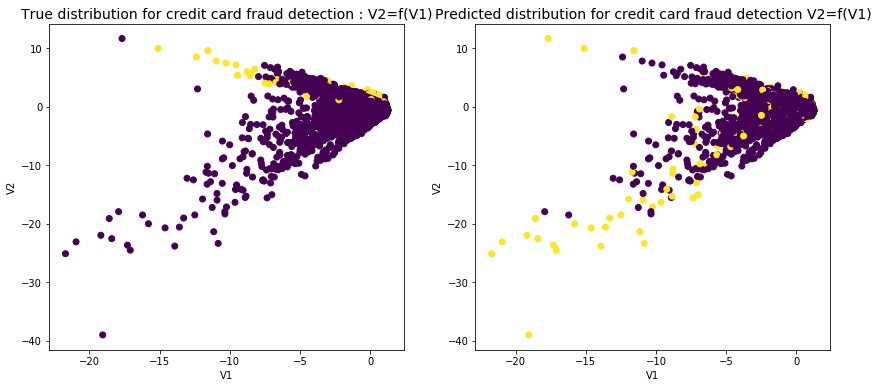

In [20]:
#Plot prediction
graph_prediction(X_test, y_test, y_pred_lof_neigh_20, 'lof_neigh_20')

In [27]:
print(int(y_pred_lof_neigh_20.sum()), "transactions classified as fraudulent out of", y_test.sum())

3445 transactions classified as fraudulent out of 95


<h4> ROC Curve

In [21]:
#Compute ROC characteristic
fpr_lof_neigh_20, tpr_lof_neigh_20, threshold_lof_neigh_20 = roc_curve(y_test, y_pred_proba_lof_neigh_20)

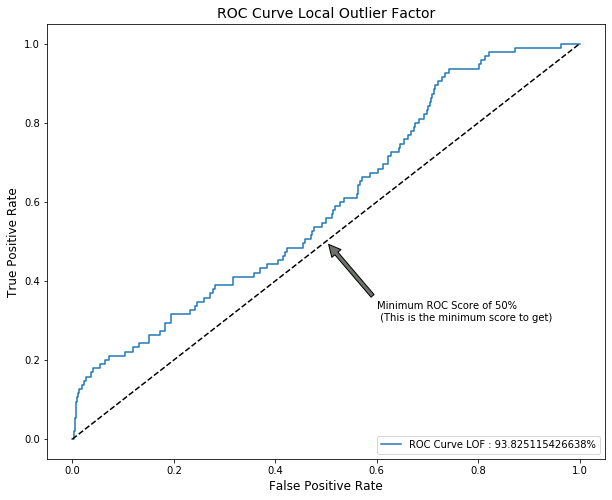

In [23]:
#Plot ROC Curve
graph_roc_curve((10, 8), 'ROC Curve Local Outlier Factor', fpr_lof_neigh_20, tpr_lof_neigh_20, 'ROC Curve LOF', acc_lof_neigh_20, 'lof-neigh-20')

LOF ROC AUC is not acceptable.

<h5> Data save

In [25]:
#Save LOF on local file 
filepath_creditcard_lof = os.path.join('data', 'creditcard_lof.pkl')
with open(filepath_creditcard_lof, 'wb') as f:
    pickle.dump((y_pred_lof_neigh_20, y_pred_proba_lof_neigh_20, fpr_lof_neigh_20, tpr_lof_neigh_20, threshold_lof_neigh_20, acc_lof_neigh_20), f)

In [26]:
#Import LOF from local file 
filepath_creditcard_lof = os.path.join('data', 'creditcard_lof.pkl')
with open(filepath_creditcard_lof, 'rb') as f:
    y_pred_lof_neigh_20, y_pred_proba_lof_neigh_20, fpr_lof_neigh_20, tpr_lof_neigh_20, threshold_lof_neigh_20, acc_lof_neigh_20 = pickle.load(f)

<h3> 2.2.3 Isolation Forest

In [37]:
def get_isolation_forest(n_estimators=100, contamination="auto", random_state=0):
    '''
    This function predicts Class transactions with Isolation Forest model
    
    Parameters
    ------------
    n_estimators : int, optional (default=100)
        The number of base estimators in the ensemble.
    contamination : 'auto' or float, optional (default='auto')
        The amount of contamination of the data set, i.e. the proportion
        of outliers in the data set. 
    behaviour : str, default='new'
        This parameter has not effect, is deprecated, and will be removed.
    random_state : int, 
        RandomState instance or None (default=0)
    
    Returns
    ------------
    y_pred : array of int
        contains predictions for fraudulent of non-fraudlent transactions
    y_pred_proba : array of int
        contains the probability of the predicted class
    '''
    #Instanciate model
    isol_forest = IsolationForest(n_estimators=n_estimators, contamination=contamination, random_state=random_state)

    #Model fitting
    print('IF time to fit :')
    %time
    isol_forest.fit(X_train)

    #Model predictions
    print('\nIF time to predict y :')
    %time
    y_pred = isol_forest.predict(X_test)
    print('\nIF time to predict y proba :')
    %time
    y_pred_proba = -isol_forest.score_samples(X_test)                         #IF returns negative score 
    
    return y_pred, y_pred_proba

In [38]:
#Prediction :
y_pred_if_est_100, y_pred_proba_if_est_100 = get_isolation_forest()

IF time to fit :
CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 11.7 µs

IF time to predict y :
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs

IF time to predict y proba :
CPU times: user 17 µs, sys: 0 ns, total: 17 µs
Wall time: 12.9 µs


In [39]:
#Predict returns 1 for an inlier and -1 for an outlier
y_pred_if_est_100[y_pred_if_est_100 == 1] = 0
y_pred_if_est_100[y_pred_if_est_100 == -1] = 1

In [40]:
#Compute accuracy_score
acc_if_est_100 = accuracy_score(y_test, y_pred_if_est_100) * 100
acc_if_est_100

95.94332640186093

In [41]:
#Compute different score
print(classification_report(y_test, y_pred_if_est_100))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56651
           1       0.03      0.81      0.06        95

    accuracy                           0.96     56746
   macro avg       0.52      0.89      0.52     56746
weighted avg       1.00      0.96      0.98     56746



**Result**: This model is not adequate to detect fraudulent transaction because f1_score is very lower (`f1_score=6%`)

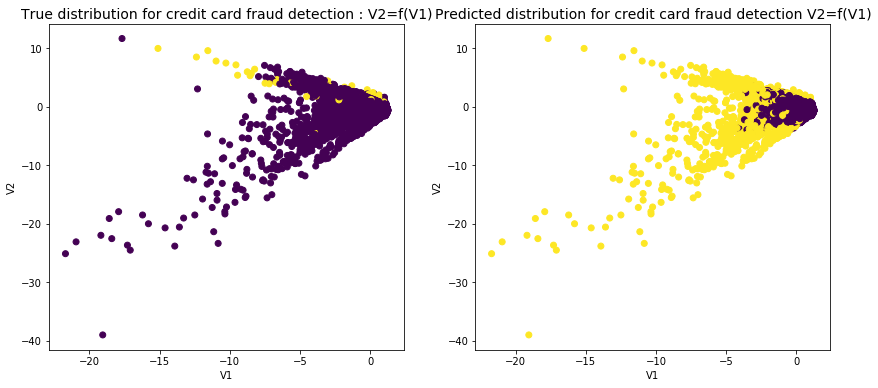

In [42]:
#Plot prediction
graph_prediction(X_test, y_test, y_pred_if_est_100, 'if')

<h5> ROC Curve

In [43]:
#Compute ROC characteristic
fpr_if_est_100, tpr_if_est_100, threshold_if_est_100 = roc_curve(y_test, y_pred_proba_if_est_100)

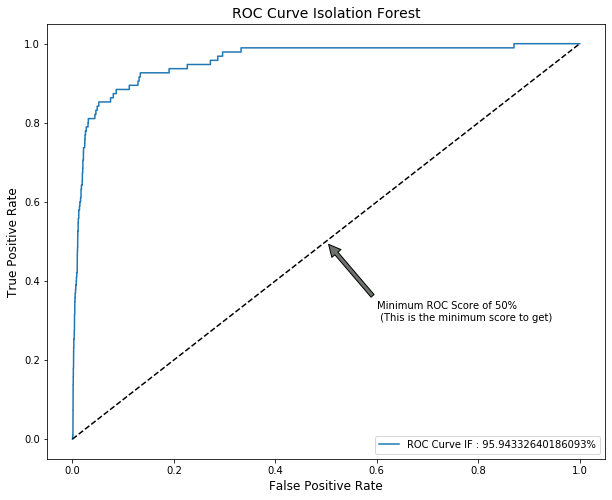

In [44]:
#Plot ROC Curve
graph_roc_curve((10, 8), 'ROC Curve Isolation Forest', fpr_if_est_100, tpr_if_est_100, 'ROC Curve IF', acc_if_est_100, 'if-est-100')

<h5> Data save

In [45]:
#Save IF on local file 
filepath_creditcard_if = os.path.join('data', 'creditcard_if.pkl')
with open(filepath_creditcard_if, 'wb') as f:
    pickle.dump((y_pred_if_est_100, y_pred_proba_if_est_100, fpr_if_est_100, tpr_if_est_100, threshold_if_est_100, acc_if_est_100), f)

In [46]:
#Import IF from local file 
filepath_creditcard_if = os.path.join('data', 'creditcard_if.pkl')
with open(filepath_creditcard_if, 'rb') as f:
    y_pred_if_est_100, y_pred_proba_if_est_100, fpr_if_est_100, tpr_if_est_100, threshold_if_est_100, acc_if_est_100 = pickle.load(f)

<h1> 3. Conclusion

Precision as the name says, says how precise (how sure) is our model in detecting fraud transactions while recall is the number of fraud cases our model is able to detect : I would like to have a high recall for fraud prediction and high F1 score.

Logistic Regresion, Gradient Boosting, Gaussian Distribution Based, Local Outlier Factor and Isolation Forest has a lower F1 score but **Random Forest Classifier** as **88% of F1 score** : It's the best model to detect fraudulent transactions.

<h1> Go further

My research can be improved by following step to add : 
- 3D Data visualization
- Compute Learning Rate for each models to correct overfitting/underfitting (Regularization)
- Apply Grid Search/Random Search method for parameter optimization 
- Apply undersampling method to balance data for Classification
- Implement Deep Learning model to detect fraudulent transactions : AutoEncoders